# Support vector classification

This brief tutorial is based on the following article (all images are from the article; many thanks to the author): https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

Firstly, I'll create a 4-dimensional dataset (3 predictor variables and one categorical outcome variable: class A or class B), on which to run the support vector classifier:

,predictor_1,predictor_2,predictor_3,classes,colour
0,99.91,0,241.27,B,blue
1,99.62,1,121.59,A,red
2,105.80,0,182.83,A,red
3,103.00,0,171.37,B,blue
4,109.32,1,165.81,A,red
...,...,...,...,...,...
95,99.32,0,98.22,B,blue
96,106.73,0,220.02,B,blue
97,118.11,0,284.52,B,blue
98,91.49,0,210.47,A,red


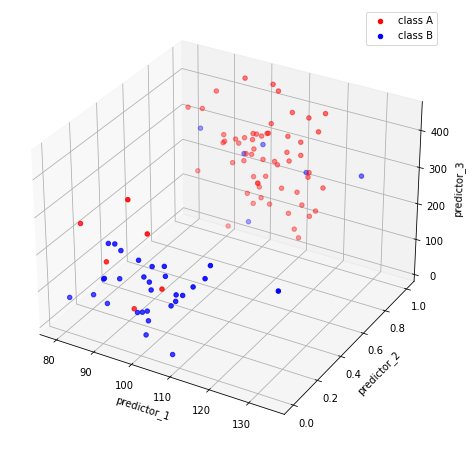

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d


# setting the number of observations
pop_size = 100

# creating 3 predictors
predictor_1 = np.random.normal(100, 10, 100)

predictor_2 = np.random.choice([0,1], p = [0.3, 0.7], size = pop_size)

predictor_3 = 10 + 2 * predictor_1 + 10 * predictor_2 + np.random.normal(0, 90, pop_size)

# putting the predictors in a dataframe
df = pd.DataFrame({'predictor_1': predictor_1.round(2),
                  'predictor_2': predictor_2,
                  'predictor_3': predictor_3.round(2)})


# creating classes based on the predictors

# an array to store the sum of the three predictors, for each observation
sums = np.array([])

# creating an array for the classes
classes = np.array([])

# probabilistically assigning an observation to 'class A' if the sum of the three predictors for that observation is above 
# the mean of the distribution of the sums of the three predictors, else probabilistically assigning the observation to 
# 'class B'
for i in np.arange(pop_size):
    
    sums = np.append(sums,  df[['predictor_1', 'predictor_2', 'predictor_3']].iloc[i].sum())
    
    if predictor_2[i] >= np.mean(predictor_2):
        
        classes = np.append(classes, np.random.choice(['A', 'B'], p = [0.8, 0.2]))
        
    else:
        
        classes = np.append(classes, np.random.choice(['A', 'B'], p = [0.2, 0.8]))


# creating a colourmap for the classes
df['classes'] = classes
df['colour'] = df['classes'].copy()

df['colour'].replace(['A', 'B'], ['red', 'blue'], inplace = True)
        
# showing the dataframe
display(df)

# creating a 3D scatter plot of the data
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(predictor_1, predictor_2, predictor_3, color = df['colour'])
ax.set_xlabel('predictor_1')
ax.set_ylabel('predictor_2')
ax.set_zlabel('predictor_3')
ax.scatter([], [], [],color = 'red', label = 'class A')
ax.scatter([], [], [], color = 'blue', label = 'class B')
plt.legend()
plt.show()

# How does support vector classification work (a very, very sparse explanation)

Support vector classification works by finding a hyperplane which has the maximum distance between the datapoints of each class. If there are two outcome classes, points on one side of the hyperplane will be predicted to be in one class; points on the other side will be predicted to be in the other class.

The hyperplane which has the maximum distance between each class of points gives optimal separability between the two classes e.g. it will be able to correctly classify the points better than other hyperplanes.

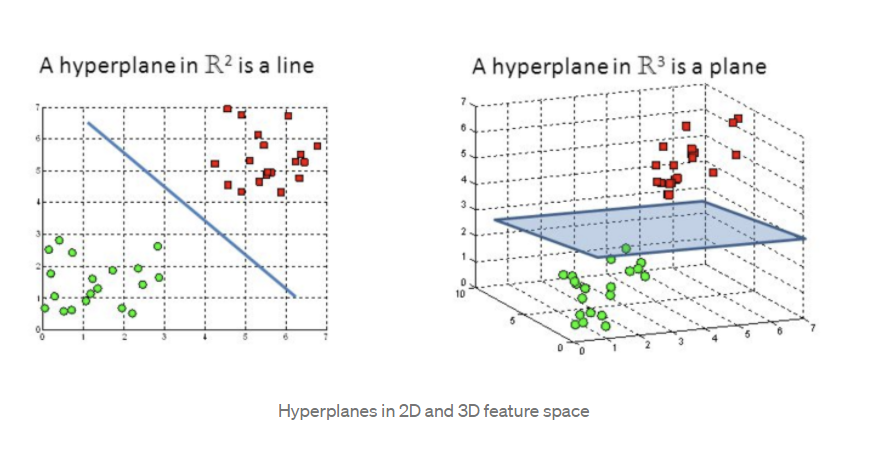

*Support vectors* are datapoints which are used to find the hyperplane which gives the *maximum margin* e.g. the largest distance between the hyperplane and both sets of points:

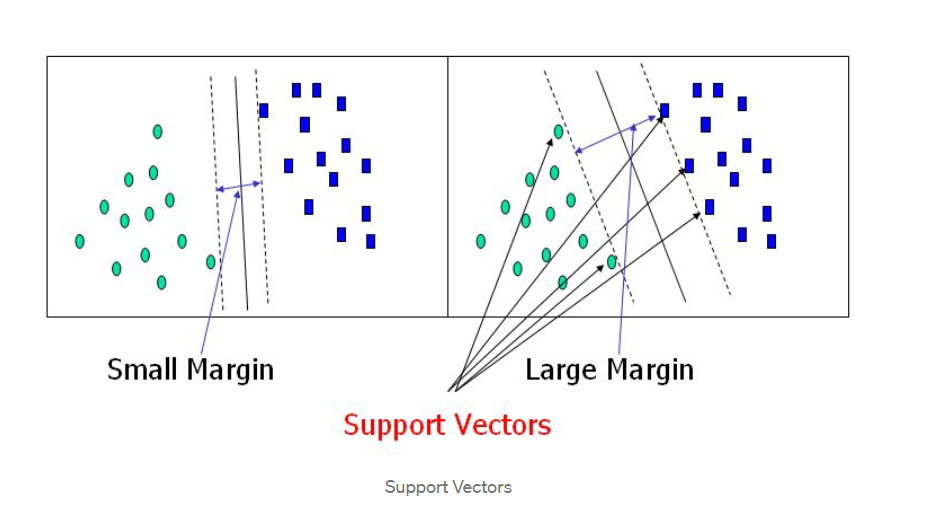

SVM classification minimizes a cost function which, when at a minimum, which find the parameters of the hyperplane with the maximum margin. For each observation, the cost function will be large when the SVM predicted class differs from the actual class, and will be small when the prediction is accurate. The minimum of the cost function is found through an iterative method (similar to https://matthew-brett.github.io/cfd2020/mean-slopes/using_minimize.html).

# Implementing the classifier

Here is one way of implementing the SVM classifier:

In [2]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# splitting the data in half, in order to use half to train the model, half to test the model

# training set
x_train = df[['predictor_1', 'predictor_2', 'predictor_3']].iloc[:int(pop_size/2)]
y_train = df['classes'].iloc[:int(pop_size/2)]

# test set
x_test = df[['predictor_1', 'predictor_2', 'predictor_3']].iloc[int(pop_size/2):]
y_test = df['classes'].loc[int(pop_size/2):]

# training the model (the 'kernal' is a function which determines the shape of the hyperplane)
# see this article: https://techvidvan.com/tutorials/svm-kernel-functions/#:~:text=The%20kernel%20functions%20are%20used,kernel%20from%20linear%20to%20polynomial.
mod = SVC(kernel='linear')
mod.fit(x_train,y_train)

# using the model to predict the test data
y_pred = mod.predict(x_test)

# seeing how accruate the model predictions were
print(accuracy_score(y_test,y_pred))

0.94


Those predictions seem acceptable. Let's generate predictions for all of the data, and plot them alongside the original data, to graphically inspect whether the SVM classifier has captured the pattern in the data:

In [3]:
predictions_all = mod.predict(df[['predictor_1', 'predictor_2', 'predictor_3']])

df['svm_predictions'] = predictions_all

df['svm_colour'] = df['svm_predictions'].copy()

df['svm_colour'].replace(['A', 'B'], ['darkred', 'darkblue'], inplace = True)

df

,predictor_1,predictor_2,predictor_3,classes,colour,svm_predictions,svm_colour
0,99.91,0,241.27,B,blue,B,darkblue
1,99.62,1,121.59,A,red,A,darkred
2,105.80,0,182.83,A,red,B,darkblue
3,103.00,0,171.37,B,blue,B,darkblue
4,109.32,1,165.81,A,red,A,darkred
...,...,...,...,...,...,...,...
95,99.32,0,98.22,B,blue,B,darkblue
96,106.73,0,220.02,B,blue,B,darkblue
97,118.11,0,284.52,B,blue,B,darkblue
98,91.49,0,210.47,A,red,B,darkblue


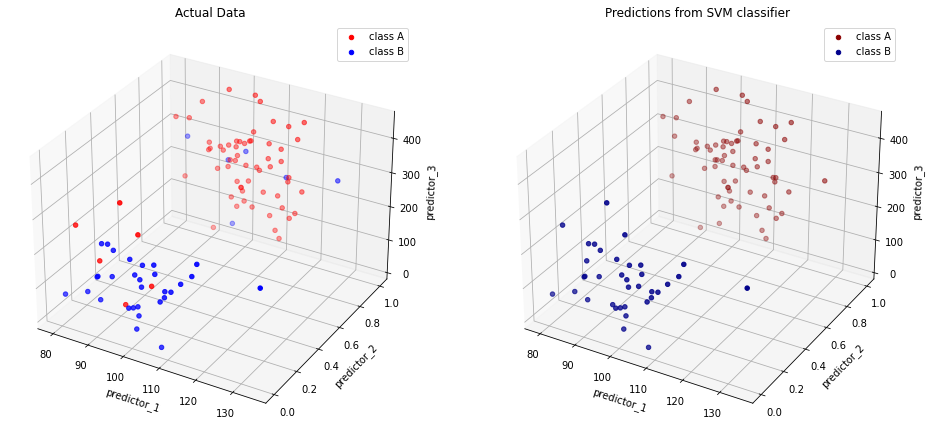

In [4]:
# creating two scattterplots, one of the original data, one of the SVM classifier predictions
fig = plt.figure(figsize = (16, 16))
ax = fig.add_subplot(1,2,1, projection='3d')

ax.scatter(predictor_1, predictor_2, predictor_3, color = df['colour'])
ax.set_xlabel('predictor_1')
ax.set_ylabel('predictor_2')
ax.set_zlabel('predictor_3')
ax.scatter([], [], [],color = 'red', label = 'class A')
ax.scatter([], [], [], color = 'blue', label = 'class B')
plt.legend()
ax.set_title('Actual Data')


ax_2 = fig.add_subplot(1,2,2, projection='3d')

ax_2.scatter(predictor_1, predictor_2, predictor_3, color = df['svm_colour'])
ax_2.set_xlabel('predictor_1')
ax_2.set_ylabel('predictor_2')
ax_2.set_zlabel('predictor_3')
ax_2.scatter([], [], [],color = 'darkred', label = 'class A')
ax_2.scatter([], [], [], color = 'darkblue', label = 'class B')
ax_2.set_title('Predictions from SVM classifier')
plt.legend()
plt.show()